<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 6: Ensemble Methods </h1>
    <h3></h3>
</center>

### 1. Problem

1) Using a decision tree model, a random forest model, and an AdaBoost model (using decision trees as base models) to classify the "pet_class_homework.csv" dataset.

2) Calculating the accuracy to evaluate the performance of three models.

3) Visualizing results: (1) Confusion Matrix. (2) Plot the multi-class ROC curve.

### 2. Data processing

1) Load the "pet_class_homework.csv" dataset and preview it.

2) Encode the labels.

3) Split the training set and the test set.

In [1]:
# Load Packages
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder

In [2]:
# Data Loading
data = pd.read_csv('pet_class_homework.csv')
print(data.head())

X = data.drop('Class', axis=1).values  
y = data['Class'].values

le = LabelEncoder()  
y = le.fit_transform(y)  

    Fur  Size  Shape  Ears  Tail  Vocal  Behavior  Legs  Eyes  Habitat Class
0 -0.98  0.17   0.49 -1.40 -0.52  -0.37      0.27 -0.26  0.45     0.10   dog
1  0.91  0.54  -2.47 -0.02  0.65  -0.66     -0.86 -1.50 -0.41     0.05   cat
2 -1.00  0.35   0.22  1.00  0.08  -0.21     -0.98 -0.00 -1.28    -1.74   cat
3 -1.25  0.41  -0.20  1.21  0.81   0.39     -0.46 -2.05  0.04    -1.02   cat
4 -0.54  1.30   0.11  1.45  0.16   0.60      1.16 -0.44 -0.75    -0.51   dog


In [3]:
from sklearn.model_selection import train_test_split  
# obtain training and testing datasets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

### 2. Model training and prediction

(1) For the decision tree model, set the depth of the tree to 3, i.e., use 'max_depth = 3'. Set the random state to 42, i.e., use 'random_state=42'.

(2) For the random forest model, the number of base models is 500, and the 'max_depth' of each base model is '3'. Set the random state to 42, i.e., use 'random_state=42'.

(3) For the AdaBoost model, the type of base models is a decision trees with  'max_depth = 3', and the number of base models is 500. Set the random state to 42, i.e., use 'random_state=42'.

(4) Use both 'predict' and 'predict_proba' to predict labels and probabilities on the test set.

(5) Calculate the accuracy to evaluate the performance of three models.

In [4]:
# Load Python packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [11]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
y_score_dt = dt_clf.predict_proba(X_test)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=3)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_score_rf = rf_clf.predict_proba(X_test)

# AdaBoost
adb_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, random_state=42)
adb_clf.fit(X_train, y_train)
y_pred_adb = adb_clf.predict(X_test)
y_score_adb = adb_clf.predict_proba(X_test)

In [13]:
# Load Python packages to evaluate the performance
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_adb = accuracy_score(y_test, y_pred_adb)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")  
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"AdaBoost Accuracy: {accuracy_adb:.4f}")

Decision Tree Accuracy: 0.4283
Random Forest Accuracy: 0.6467
AdaBoost Accuracy: 0.6717


### 3. Visualizing results 
(1) Confusion Matrix. 

(2) Plot the multi-class ROC curve.

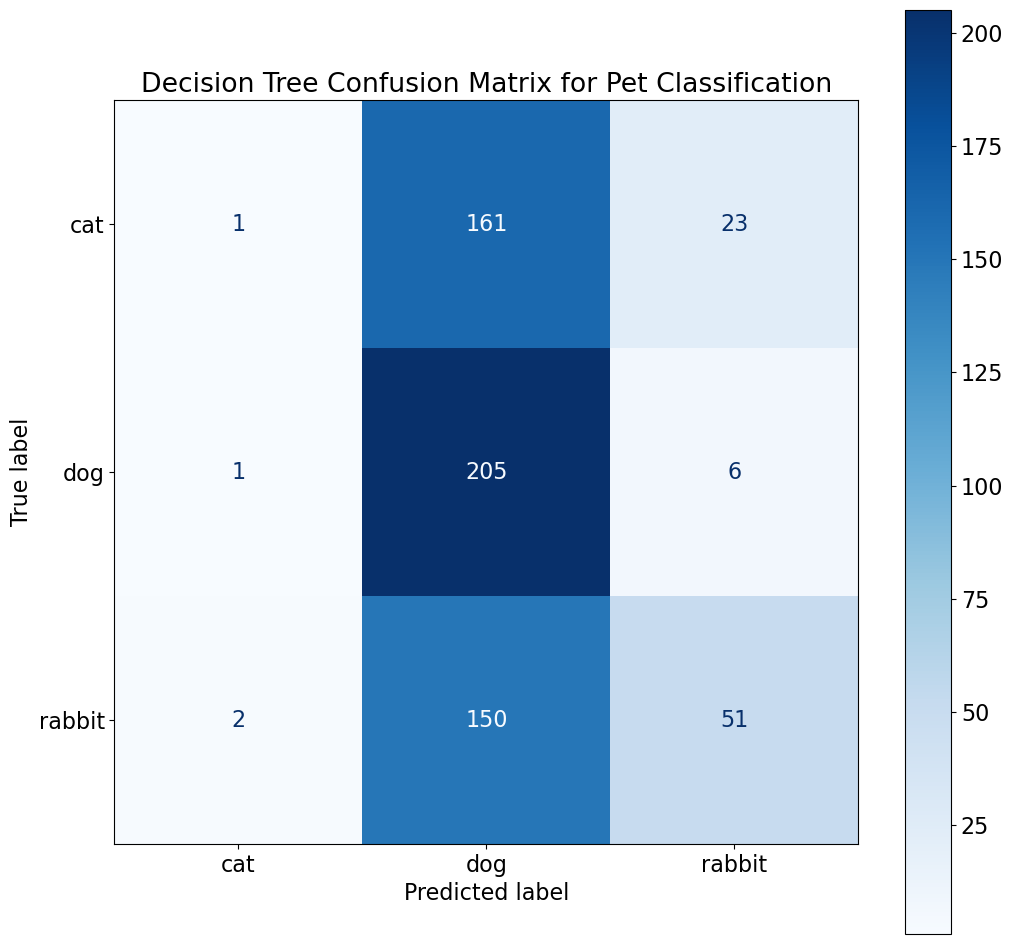

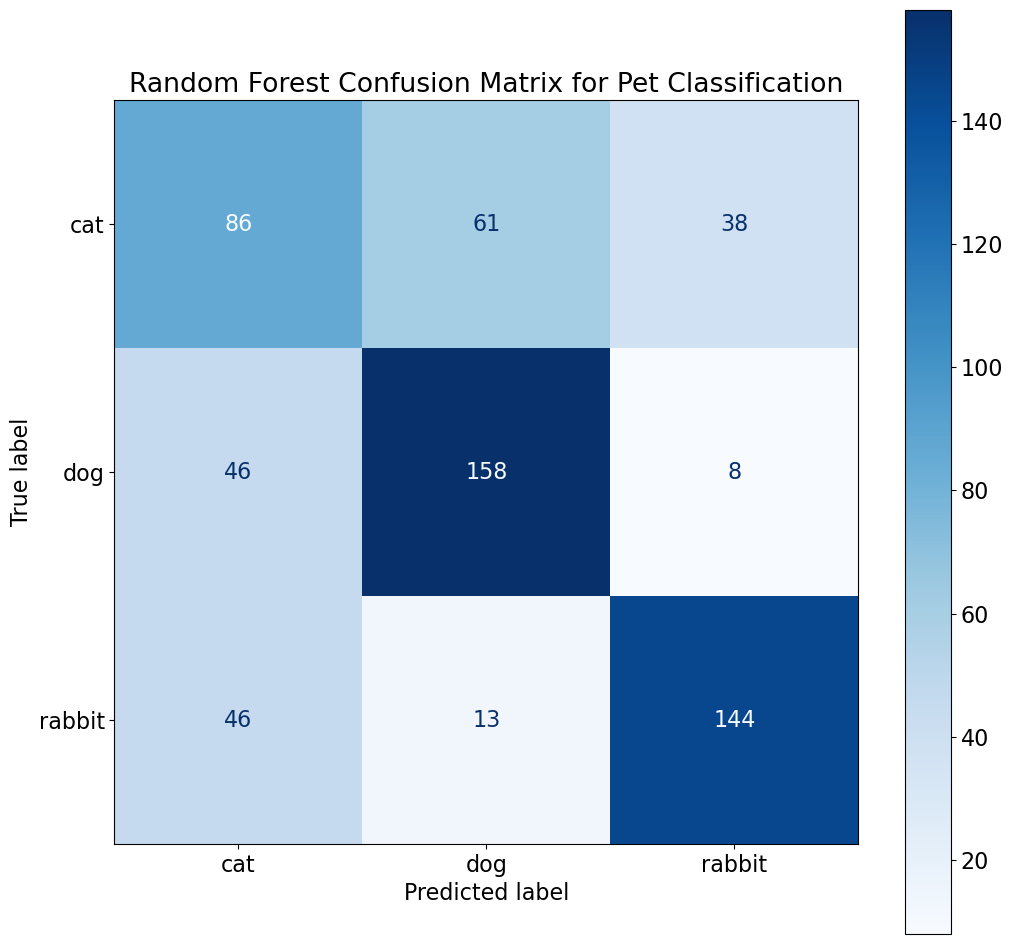

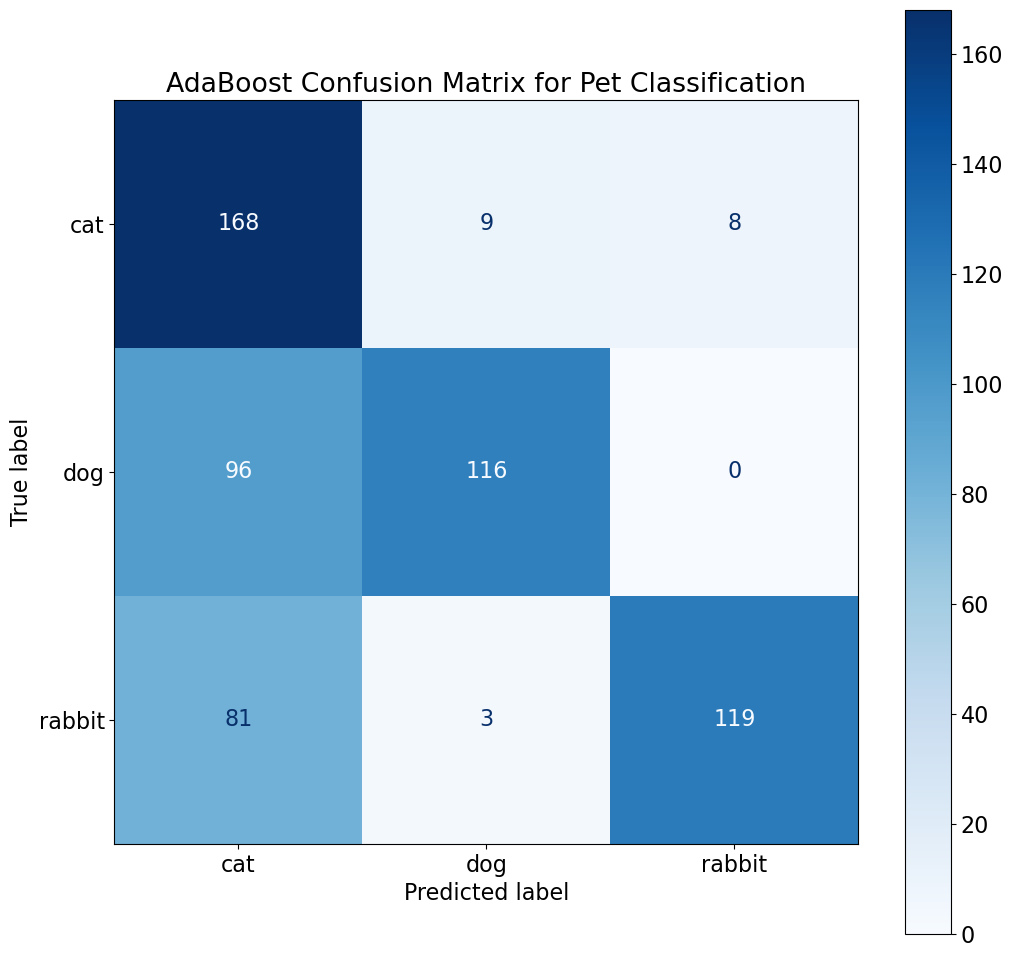

In [14]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  
import matplotlib as mpl
mpl.rcParams["font.size"] = 16

# Decision Tree
fig, ax = plt.subplots(figsize=(12, 12))
_ = ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test, display_labels=le.classes_,
                                          ax=ax, cmap='Blues')
plt.title("Decision Tree Confusion Matrix for Pet Classification")
plt.show()

# Random Forest
fig, ax = plt.subplots(figsize=(12, 12))
_ = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=le.classes_,
                                          ax=ax, cmap='Blues')
plt.title("Random Forest Confusion Matrix for Pet Classification")
plt.show()

# AdaBoost
fig, ax = plt.subplots(figsize=(12, 12))
_ = ConfusionMatrixDisplay.from_estimator(adb_clf, X_test, y_test, display_labels=le.classes_,
                                          ax=ax, cmap='Blues')
plt.title("AdaBoost Confusion Matrix for Pet Classification")
plt.show()

Decision Tree: Micro-averaged One-vs-Rest ROC AUC score:
0.59355
Random Forest: Micro-averaged One-vs-Rest ROC AUC score:
0.79180
AdaBoost: Micro-averaged One-vs-Rest ROC AUC score:
0.83438


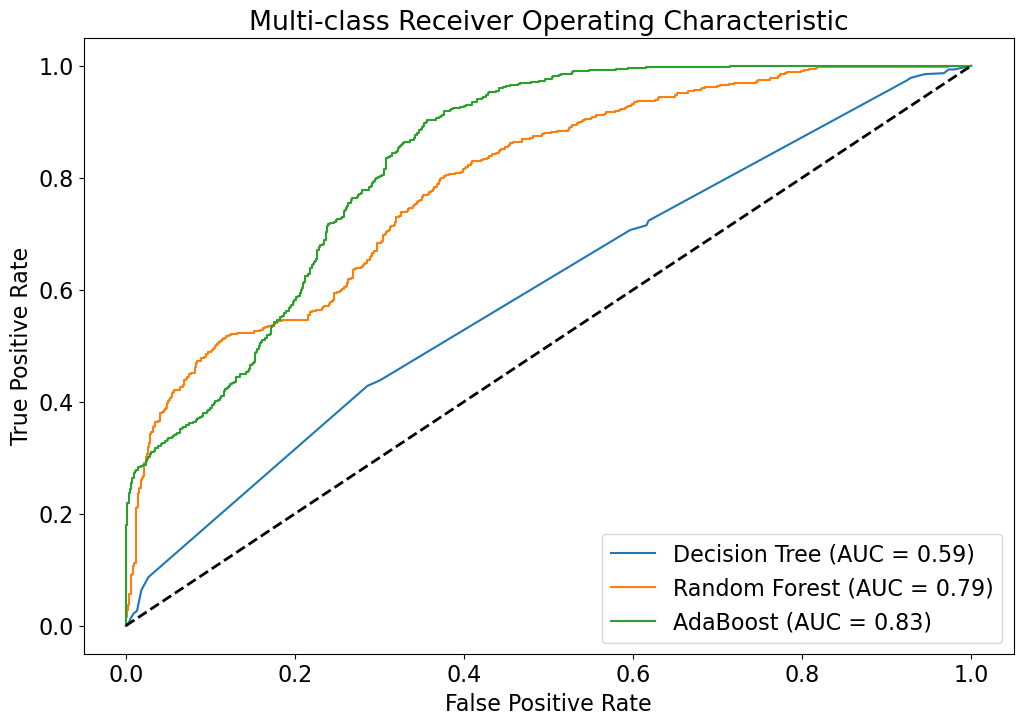

In [19]:
# Load Python packages for the multi-class ROC curve
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelBinarizer

# Binarize labels (One-hot encoder)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Calculate FPR and TPR
fpr, tpr, roc_auc = dict(), dict(), dict()
# Decision Tree
fpr["decision tree"], tpr["decision tree"], _ = roc_curve(y_test_binarized.ravel(), y_score_dt.ravel())
roc_auc["decision tree"] = auc(fpr["decision tree"], tpr["decision tree"])

# Random Forest
fpr["random forest"], tpr["random forest"], _ = roc_curve(y_test_binarized.ravel(), y_score_rf.ravel())
roc_auc["random forest"] = auc(fpr["random forest"], tpr["random forest"])

# AdaBoost
fpr["AdaBoost"], tpr["AdaBoost"], _ = roc_curve(y_test_binarized.ravel(), y_score_adb.ravel())
roc_auc["AdaBoost"] = auc(fpr["AdaBoost"], tpr["AdaBoost"])

print(f"Decision Tree: Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['decision tree']:.5f}")
print(f"Random Forest: Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['random forest']:.5f}")
print(f"AdaBoost: Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['AdaBoost']:.5f}")

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(fpr["decision tree"], tpr["decision tree"], label=f'Decision Tree (AUC = {roc_auc["decision tree"]:.2f})')
plt.plot(fpr["random forest"], tpr["random forest"], label=f'Random Forest (AUC = {roc_auc["random forest"]:.2f})')
plt.plot(fpr["AdaBoost"], tpr["AdaBoost"], label=f'AdaBoost (AUC = {roc_auc["AdaBoost"]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic')
plt.legend()
plt.show()
